In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import backend as K


2023-10-28 23:02:41.008680: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
# Test if gpu is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.gpu_device_name()

Num GPUs Available:  2


2023-10-28 23:02:43.877991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-28 23:02:43.878173: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-28 23:02:43.899218: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

'/device:GPU:0'

In [22]:
data_dir = pathlib.Path().absolute()
pics = list(data_dir.glob('*/*.jpg'))
pics += list(data_dir.glob('*/*.jpeg'))
pics += list(data_dir.glob('*/*.png'))

print(len(pics))
# PIL.Image.open(pics[2])

/home/lehoangchibach/Documents/Code/FinalProjectML/dogs /home/lehoangchibach/Documents/Code/FinalProjectML/dogs
1030


In [4]:
data_dir = pathlib.Path().absolute()
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=608)
  # image_size=(img_height, img_width)


Found 1030 files belonging to 5 classes.


2023-05-04 19:41:26.198976: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.


Using 824 files for training.


2023-05-04 19:41:26.199457: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-04 19:41:26.199718: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-04 19:41:27.074087: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-04 19:41:27.074417: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-04 19:41:27.074437: I tensorflow/core/co

In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=227)


Found 1030 files belonging to 5 classes.
Using 206 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)


['french_bulldog', 'german_shepherd', 'golden_retriever', 'poodle', 'yorkshire_terrier']


In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


NameError: name 'train_ds' is not defined

<Figure size 1000x1000 with 0 Axes>

In [43]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [85]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
num_classes = len(class_names)


In [107]:

K.clear_session()

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [108]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/9
26/26 [==============================] - 3s 51ms/step - loss: 1.7337 - accuracy: 0.2233 - val_loss: 1.6019 - val_accuracy: 0.1942
Epoch 2/9
26/26 [==============================] - 1s 39ms/step - loss: 1.5661 - accuracy: 0.2633 - val_loss: 1.5440 - val_accuracy: 0.3398
Epoch 3/9
26/26 [==============================] - 1s 43ms/step - loss: 1.4985 - accuracy: 0.3313 - val_loss: 1.4002 - val_accuracy: 0.4272
Epoch 4/9
26/26 [==============================] - 1s 42ms/step - loss: 1.3570 - accuracy: 0.4381 - val_loss: 1.3128 - val_accuracy: 0.5291
Epoch 5/9
26/26 [==============================] - 1s 38ms/step - loss: 1.1958 - accuracy: 0.5182 - val_loss: 1.1089 - val_accuracy: 0.5825
Epoch 6/9
26/26 [==============================] - 1s 40ms/step - loss: 0.9883 - accuracy: 0.6274 - val_loss: 0.9478 - val_accuracy: 0.6699
Epoch 7/9
26/26 [==============================] - 1s 39ms/step - loss: 0.7287 - accuracy: 0.7379 - val_loss: 1.0301 - val_accuracy: 0.6505
Epoch 8/9
26/26 [===

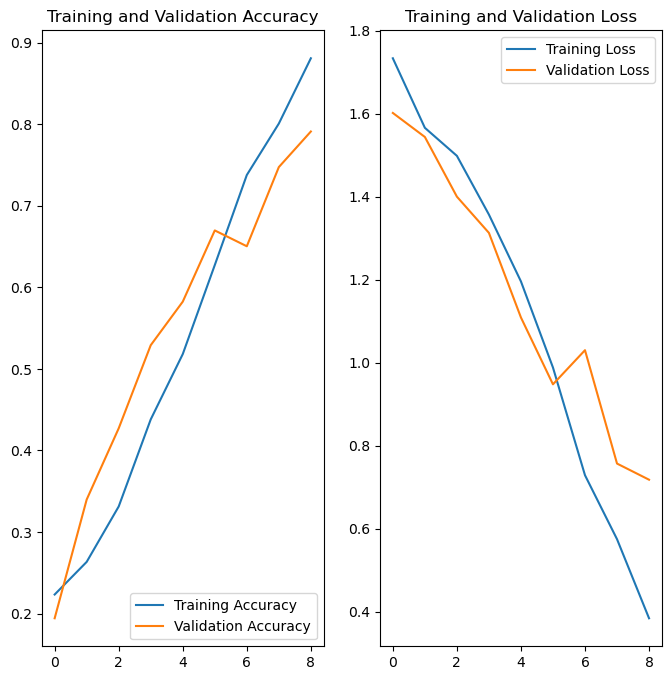

In [109]:
# model.summary()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.15),
  ]
)


In [66]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")


In [91]:
K.clear_session()
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPool2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [92]:
epochs = 80
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/80


2023-05-04 21:04:47.292648: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


26/26 [==============================] - 3s 55ms/step - loss: 1.6056 - accuracy: 0.2415 - val_loss: 1.6051 - val_accuracy: 0.1942
Epoch 2/80
26/26 [==============================] - 1s 49ms/step - loss: 1.5877 - accuracy: 0.2828 - val_loss: 1.5551 - val_accuracy: 0.3398
Epoch 3/80
26/26 [==============================] - 1s 50ms/step - loss: 1.5169 - accuracy: 0.3131 - val_loss: 1.4224 - val_accuracy: 0.3641
Epoch 4/80
26/26 [==============================] - 1s 50ms/step - loss: 1.4406 - accuracy: 0.3701 - val_loss: 1.5391 - val_accuracy: 0.2767
Epoch 5/80
26/26 [==============================] - 1s 53ms/step - loss: 1.3898 - accuracy: 0.3738 - val_loss: 1.4135 - val_accuracy: 0.4175
Epoch 6/80
26/26 [==============================] - 1s 50ms/step - loss: 1.3610 - accuracy: 0.4041 - val_loss: 1.6049 - val_accuracy: 0.3544
Epoch 7/80
26/26 [==============================] - 1s 50ms/step - loss: 1.3482 - accuracy: 0.4442 - val_loss: 1.4222 - val_accuracy: 0.4515
Epoch 8/80
26/26 [======

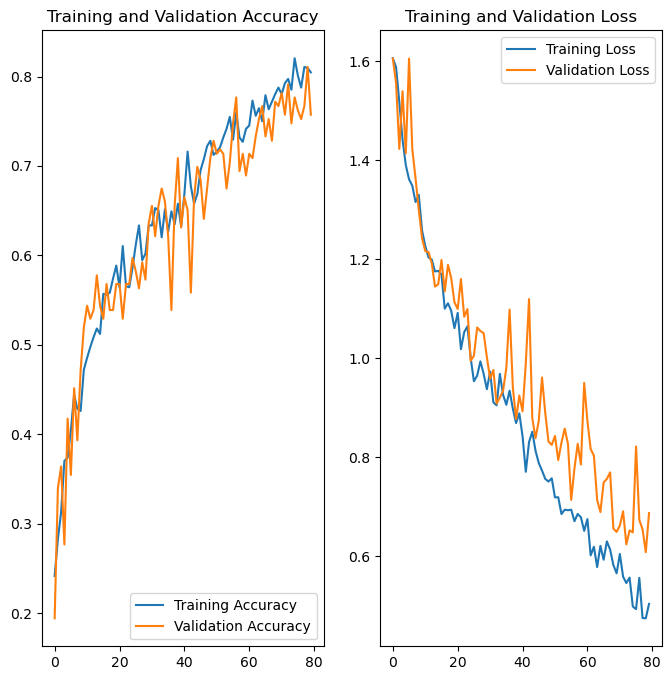

In [93]:
# model.summary()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [87]:
# model.save('./models/2layers_38epochs')